# Silicio

In [2]:
using LinearAlgebra
using PyCall
using PyPlot
using LaTeXStrings

In [18]:
pygui(false)

false

In [3]:
#{S,P_x,P_y,P_z}
ε_s=-13.55#eV
ε_p=ε_x=ε_y=ε_z=-6.52#eV
V_ssσ=-2.37#eV
V_spσ=2.52#eV
V_ppσ=3.32#eV
V_ppπ=-1.07#eV

-1.07

In [4]:
#Base cartesiana

xu=[1,0,0];
yu=[0,1,0];
zu=[0,0,1];
e=[xu,yu,zu];

#Eelementos de la red

a=0.707;
a1=a*[1/2,1/2,0];
a2=a*[1/2,0,1/2];
a3=a*[0,1/2,1/2];
#Base atómica

s1=[0,0,0];
s2=a*[1/4,1/4,1/4];

In [5]:
#Primeros vecinos y vectores unitarios
#Para s2
δ21=-(s1-s2);
δ22=-(a1-s2);
δ23=-(a2-s2);
δ24=-(a3-s2);

δ21u=δ21/norm(δ21);
δ22u=δ22/norm(δ22);
δ23u=δ23/norm(δ23);
δ24u=δ24/norm(δ24);

#Para s1
δ11=-s2-s1;
δ12=-a1-s1;
δ13=-a2-s1;
δ14=-a3-s1;

δ11u=δ11/norm(δ11);
δ12u=δ12/norm(δ12);
δ13u=δ13/norm(δ13);
δ14u=δ14/norm(δ14);

εs=-13.55 #eV
εp=-6.52


δ1=[δ11,δ12,δ13,δ14]
δ2=[δ21,δ22,δ23,δ24]
δ1u=[δ11u,δ12u,δ13u,δ14u]
δ2u=[δ21u,δ22u,δ23u,δ24u]

δu=[δ1u,δ2u]
δ=[δ1,δ2]
ε=[εs,εp,εp,εp];

In [6]:
function δk(i,j)
   if i==j
        
        1
    else
        0
    end
end;

In [7]:
function Cosdir(a)
if a!=[0,0,0]
        
au=a/norm(a);
    
l=au'xu;
m=au'yu;
n=au'zu;
    
    return [1,l,m,n]
        
    else
        return [0,0,0,0]
    end
end;

In [8]:
function c(t,p,a)
    
    return trunc(Int,-2*a/pi *atan(cot( (t+0.01-1)*pi/p )) +3)
    end;

at=[1,1,1,1,2,2,2,2];

In [9]:
function Vec(α,β,γ)
    
    if α==1 && β==2
        return δ2[γ]
    elseif α==2 && β==1
        return δ2[γ]
    else 
        return [0,0,0]
    end
    
end    

Vec (generic function with 1 method)

In [10]:
function t(s,p,a)
    
    if s==p && s==1
        return V_ssσ
    elseif s==p
        return Cosdir(a)[s]^2*V_ppσ+(1-Cosdir(a)[s]^2)*V_ppπ
        Cosdir(a)[s]^2*V_ppσ+(1-Cosdir(a)[s]^2)*V_ppπ
    elseif s==1 && p!=1 || s!=1 && p==1
          if s==1
            return Cosdir(a)[p]*V_spσ
        else
            return Cosdir(a)[s]*V_spσ
        end
        
       
    elseif s==2 && p==3 || s==3 && p==2
        return Cosdir(a)[2]*Cosdir(a)[3]*(V_ppσ-V_ppπ)
    elseif s==2 && p==4 || s==4 && p==2
        return Cosdir(a)[2]*Cosdir(a)[4]*(V_ppσ-V_ppπ)
    elseif s==3 && p==4 || s==4 && p==3
        return Cosdir(a)[3]*Cosdir(a)[4]*(V_ppσ-V_ppπ)
        end
    end;

In [11]:
function Σ(i,j,x,y,z)
    q=[x,y,z];
    f=0;  
    ima=1im;
    for w=1:4
        
    f+=exp(-ima*(q'Vec(at[i],at[j],w)))*t(c(i,4,2),c(j,4,2),Vec(at[i],at[j],w));
        
        end#w
    
    return f
    end;

In [12]:
#Matriz

x=y=z=1;
M=zeros(Complex{Float64},8,8);
for i=1:8
    for j=1:8
       if j>=i
             M[i,j]=δk(i,j)ε[c(i,4,2)]+(1-δk(at[i],at[j]))*Σ(i,j,x,y,z)
        else
            M[i,j]=δk(i,j)ε[c(i,4,2)]+(1-δk(at[i],at[j]))*Σ(i,j,-x,-y,-z)
        end
        
        end #j
    end #i
#display(M)
display(conj!(permutedims(M, [2,1]))-M)

8×8 Array{Complex{Float64},2}:
 0.0+0.0im  0.0-0.0im  0.0-0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0-0.0im  0.0+0.0im  0.0-0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0-0.0im  0.0-0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0-0.0im  0.0-0.0im  0.0-0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0-0.0im  0.0-0.0im  0.0-0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0-0.0im  0.0-0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0-0.0im  0.0+0.0im  0.0-0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0-0.0im  0.0-0.0im  0.0+0.0im

In [13]:
#Matriz
function Ei(x,y,z)
#x=y=z=1;
M=zeros(Complex{Float64},8,8);
for i=1:8
    for j=1:8
       if j>=i
             M[i,j]=δk(i,j)ε[c(i,4,2)]+(1-δk(at[i],at[j]))*Σ(i,j,x,y,z)
        else
            M[i,j]=δk(i,j)ε[c(i,4,2)]+(1-δk(at[i],at[j]))*Σ(i,j,-x,-y,-z)
        end
        end #j
    end #i
return eigvals(M)
end

Ei (generic function with 1 method)

In [14]:
#Matriz

x=y=z=1;
M=zeros(Complex{Float64},8,8);
for i=1:8
    for j=1:8
       if j>=i
             M[i,j]=δk(i,j)ε[c(i,4,2)]+(1-δk(at[i],at[j]))*Σ(i,j,x,y,z)
        else
            M[i,j]=δk(i,j)ε[c(i,4,2)]+(1-δk(at[i],at[j]))*Σ(i,j,-x,-y,-z)
        end
        
        end #j
    end #i
display(M-conj!(permutedims(M, [2,1])))
#display(permutedims(conj!(M), [2,1])-M)

8×8 Array{Complex{Float64},2}:
 0.0-0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0-0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0-0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0-0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0-0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0-0.0im

In [15]:
function Ei1(d,f,g)
    return Ei(d,f,g)[1]
end

function Ei2(d,f,g)
    return Ei(d,f,g)[2]
end
function Ei3(d,f,g)
    return Ei(d,f,g)[3]
end
function Ei4(d,f,g)
    return Ei(d,f,g)[4]
end
function Ei5(d,f,g)
    return Ei(d,f,g)[5]
end
function Ei6(d,f,g)
    return Ei(d,f,g)[6]
end
function Ei7(d,f,g)
    return Ei(d,f,g)[7]
end

function Ei8(d,f,g)
    return Ei(d,f,g)[8]
end

Ei8 (generic function with 1 method)

In [16]:
L=[pi/a,pi/a,pi/a];
Γ=[0,0,0,];
X=[2pi/a,0,0];
K=[3pi/ 2a,3pi/ 2a,0];

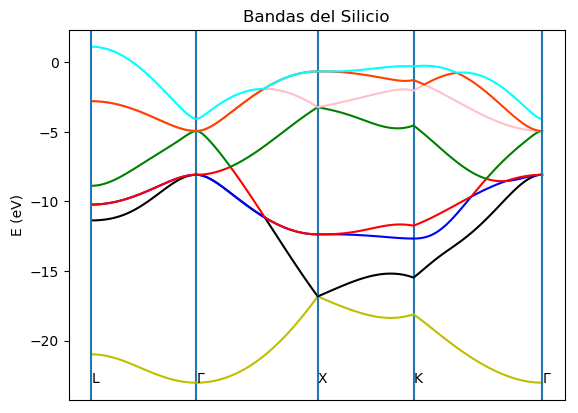

In [75]:

LΓ=0:0.1:sqrt(3)*pi/a;

ty=zeros(length(LΓ));
for m=1:length(LΓ)
    ty[m]=sqrt(3)*pi/a-LΓ[m]
    end;


h1=Ei1.(ty/sqrt(3),ty/sqrt(3),ty/sqrt(3));
h2=Ei2.(ty/sqrt(3),ty/sqrt(3),ty/sqrt(3));
h3=Ei3.(ty/sqrt(3),ty/sqrt(3),ty/sqrt(3));
h4=Ei4.(ty/sqrt(3),ty/sqrt(3),ty/sqrt(3));
h5=Ei5.(ty/sqrt(3),ty/sqrt(3),ty/sqrt(3));
h6=Ei6.(ty/sqrt(3),ty/sqrt(3),ty/sqrt(3));
h7=Ei7.(ty/sqrt(3),ty/sqrt(3),ty/sqrt(3));
h8=Ei8.(ty/sqrt(3),ty/sqrt(3),ty/sqrt(3));

plot(LΓ,h1,"y")
plot(LΓ,h2,"k")
plot(LΓ,h3,"b")
plot(LΓ,h4,"r")
plot(LΓ,h5,"g")
plot(LΓ,h6,color=:pink)
plot(LΓ,h7,color=:"#FF4000")
plot(LΓ,h8,color=:cyan)
axvline(0)
annotate("L",(0,-23))
axvline(sqrt(3)*pi/a)
annotate("Γ",(sqrt(3)*pi/a,-23))

ΓX=sqrt(3)*pi/a:0.1:sqrt(3)*pi/a+ 2pi/a;
gx=0:0.1:2pi/a;

i1=Ei1.(gx,0,0);
i2=Ei2.(gx,0,0);
i3=Ei3.(gx,0,0);
i4=Ei4.(gx,0,0);
i5=Ei5.(gx,0,0);
i6=Ei6.(gx,0,0);
i7=Ei7.(gx,0,0);
i8=Ei8.(gx,0,0);

plot(ΓX,i1,"y")
plot(ΓX,i2,"k")
plot(ΓX,i3,"b")
plot(ΓX,i4,"r")
plot(ΓX,i5,"g")
plot(ΓX,i6,color=:pink)
plot(ΓX,i7,color=:"#FF4000")
plot(ΓX,i8,color=:cyan)
axvline(sqrt(3)*pi/a+ 2pi/a)
annotate("X",(sqrt(3)*pi/a+ 2pi/a,-23))

XK=sqrt(3)*pi/a+ 2pi/a:0.1:sqrt(3)*pi/a+ 2pi/a+norm(K-X);
xk=0:1/(length(XK)-1):1;


xj=zeros(length(xk));
yj=zeros(length(xk));
for li=1:1:length(xk)
 xj[li]=2pi/a-(pi/2a)*xk[li];
 yj[li]=(3pi/2a)*xk[li];
    end    
j1=Ei1.(xj,yj,0);
j2=Ei2.(xj,yj,0);
j3=Ei3.(xj,yj,0);
j4=Ei4.(xj,yj,0);
j5=Ei5.(xj,yj,0);
j6=Ei6.(xj,yj,0);
j7=Ei7.(xj,yj,0);
j8=Ei8.(xj,yj,0);

plot(XK,j1,"y")
plot(XK,j2,"k")
plot(XK,j3,"b")
plot(XK,j4,"r")
plot(XK,j5,"g")
plot(XK,j6,color=:pink)
plot(XK,j7,color=:"#FF4000")
plot(XK,j8,color=:cyan)
axvline(sqrt(3)*pi/a+ 2pi/a+norm(K-X))
annotate("K",(sqrt(3)*pi/a+ 2pi/a+norm(K-X),-23))
KΓ=sqrt(3)*pi/a+ 2pi/a+norm(K-X):0.1:sqrt(3)*pi/a+ 2pi/a+norm(K-X)+norm(K);
kg=0:1/(length(KΓ)-1):1;

xl=zeros(length(kg));
yl=zeros(length(kg));
for li=1:1:length(kg)
 xl[li]=3pi/2a-(3pi/2a)*kg[li];
 yl[li]=3pi/2a-(3pi/2a)*kg[li];
    end    

l1=Ei1.(xl,yl,0);
l2=Ei2.(xl,yl,0);
l3=Ei3.(xl,yl,0);
l4=Ei4.(xl,yl,0);
l5=Ei5.(xl,yl,0);
l6=Ei6.(xl,yl,0);
l7=Ei7.(xl,yl,0);
l8=Ei8.(xl,yl,0);

plot(KΓ,l1,"y")
plot(KΓ,l2,"k")
plot(KΓ,l3,"b")
plot(KΓ,l4,"r")
plot(KΓ,l5,"g")
plot(KΓ,l6,color=:pink)
plot(KΓ,l7,color=:"#FF4000")

plot(KΓ,l8,color=:cyan)
hj=axvline(sqrt(3)*pi/a+ 2pi/a+norm(K-X)+norm(K))
annotate("Γ",(sqrt(3)*pi/a+ 2pi/a+norm(K-X)+norm(K),-23))

ylabel("E (eV)")
title("Bandas del Silicio")
PyPlot.tick_params(bottom="off",labelbottom="off")

In [35]:
lor(x,x0,γ)= (1/pi)*(γ^2/((x-x0)^2+γ^2)); #Definición de una lorentziana con parámetro de anchura γ, centrada en el punto x0 y que depende de x

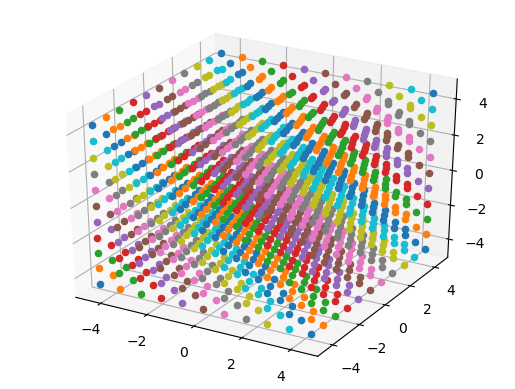

In [29]:
de=10;
for i=-pi/a:(2pi/a)/de:pi/a,j=-pi/a:(2pi/a)/de:pi/a,k=-pi/a:(2pi/a)/de:pi/a;
    
    scatter3D(i,j,k)
end

In [30]:
En=[]

for i=-pi/a:(2pi/a)/de:pi/a,j=-pi/a:(2pi/a)/de:pi/a,k=-pi/a:(2pi/a)/de:pi/a;
        
    push!(En,Ei(i,j,k))
        
    
    end;


In [36]:
function DOS(E) #density of states, #Definición de la DOS como sumas de lorentzianas
    
    D=0;
    for n=1:length(En)
     for lu=1:length(En[n]) #Aquí se suma las ocho energías por punto
        
      D+=lor(E,En[n][lu],1/100); #Un factor de 1/100 fue elegido para que las lorentzianas sean delgadas (puede cambiarse).
      end
    end
    
    return D
end



DOS (generic function with 1 method)

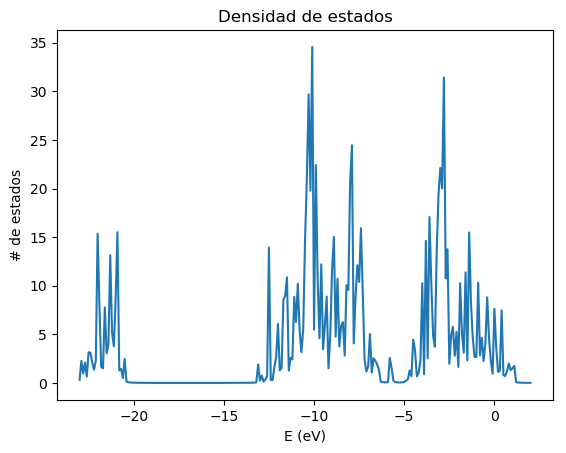

PyObject Text(0.5, 24.0, 'E (eV)')

In [76]:
ens=-23:0.1:2;
Ens=DOS.(ens);

plot(ens,Ens)

title("Densidad de estados")
ylabel("# de estados")
xlabel("E (eV)")